## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
languages = pd.read_csv("QueryResults.csv", names=["date", "tag", "posts"])
languages = languages.drop(0, axis=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
languages.head()

,date,tag,posts
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0
5,2008-08-01 00:00:00,python,124.0


In [4]:
languages.tail()

,date,tag,posts
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0
1991,2020-07-01 00:00:00,swift,3607.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
languages.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
print(len(languages["date"]))
print(len(languages["tag"]))
print(len(languages["posts"]))

1991
1991
1991


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
languages_by_popularity = languages.groupby(by="tag")
languages_by_popularity.sum().sort_values(by="posts", ascending=False)

/tmp/ipykernel_461799/285996208.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  languages_by_popularity.sum().sort_values(by="posts", ascending=False)


,posts
tag,
javascript,2056510.0
java,1696403.0
python,1496210.0
c#,1423530.0
php,1361988.0
c++,684210.0
r,356799.0
c,336042.0
swift,273055.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
languages_by_popularity.count().sort_values(by="date", ascending=False)

,date,posts
tag,,
c#,145,145
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144
perl,144,144
php,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
languages["date"] = pd.to_datetime(languages.date)
languages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 1 to 1991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1991 non-null   datetime64[ns]
 1   tag     1991 non-null   object        
 2   posts   1991 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.8+ KB


## Data Manipulation



In [10]:
pivoted_languages = languages.pivot(index="date", columns="tag", values="posts")


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [11]:
pivoted_languages.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [12]:
pivoted_languages.shape

(145, 14)

In [13]:
pivoted_languages.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='tag')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [14]:
pivoted_languages.count()

tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [15]:
pivoted_languages.fillna(0, inplace=True)

In [16]:
pivoted_languages.count()

tag
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

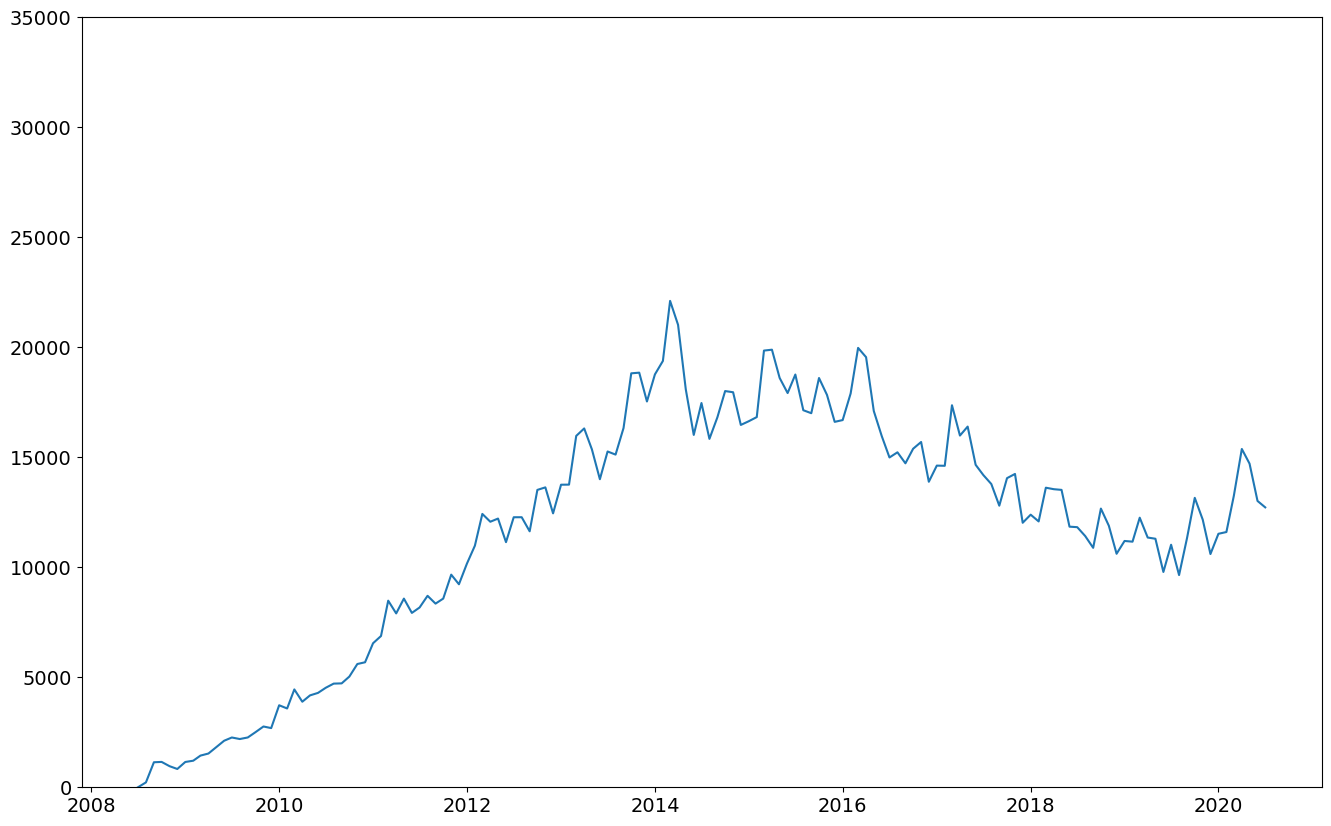

In [24]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)

plt.plot(pivoted_languages.index, pivoted_languages["java"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

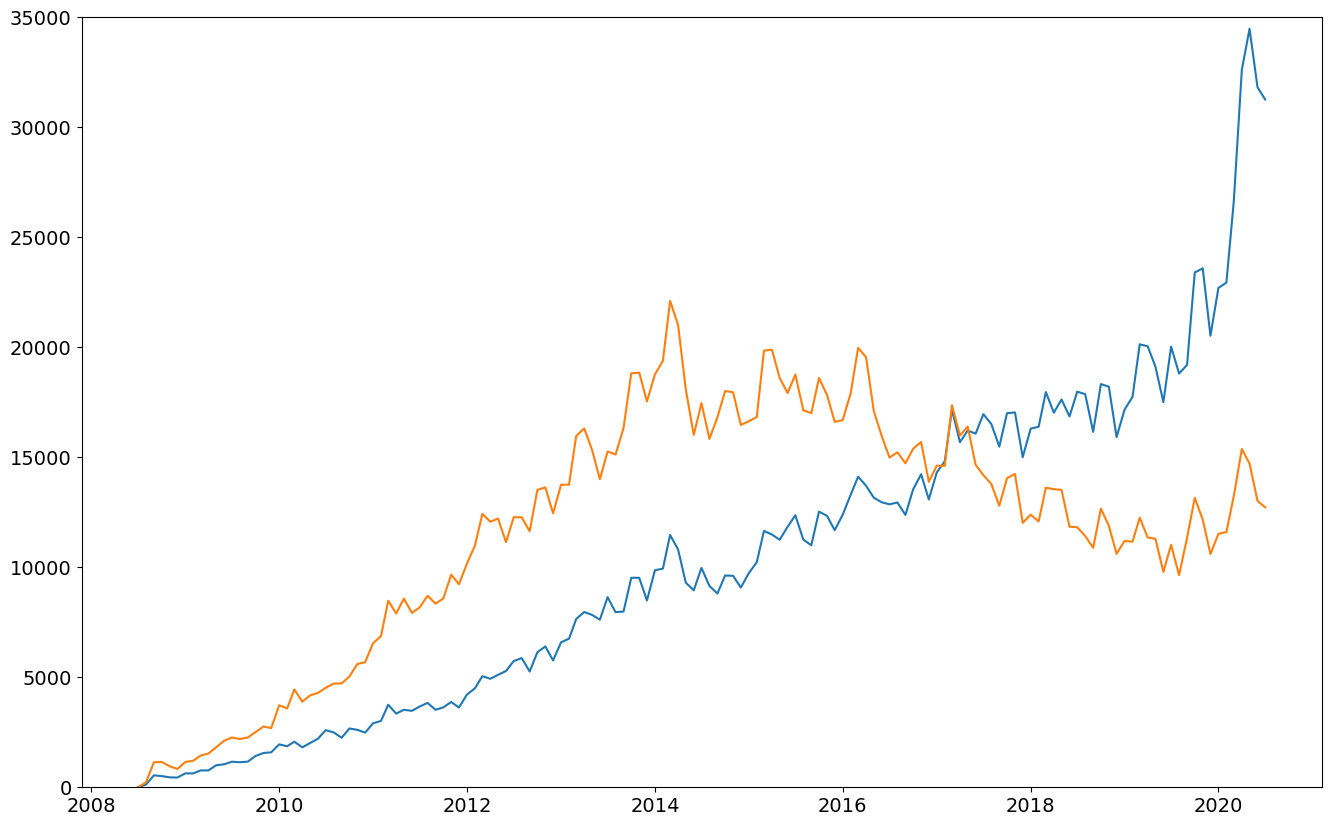

In [25]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)

plt.plot(pivoted_languages.index, pivoted_languages["python"])
plt.plot(pivoted_languages.index, pivoted_languages["java"])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [31]:
roll_languages = pivoted_languages.rolling(window=6).mean()

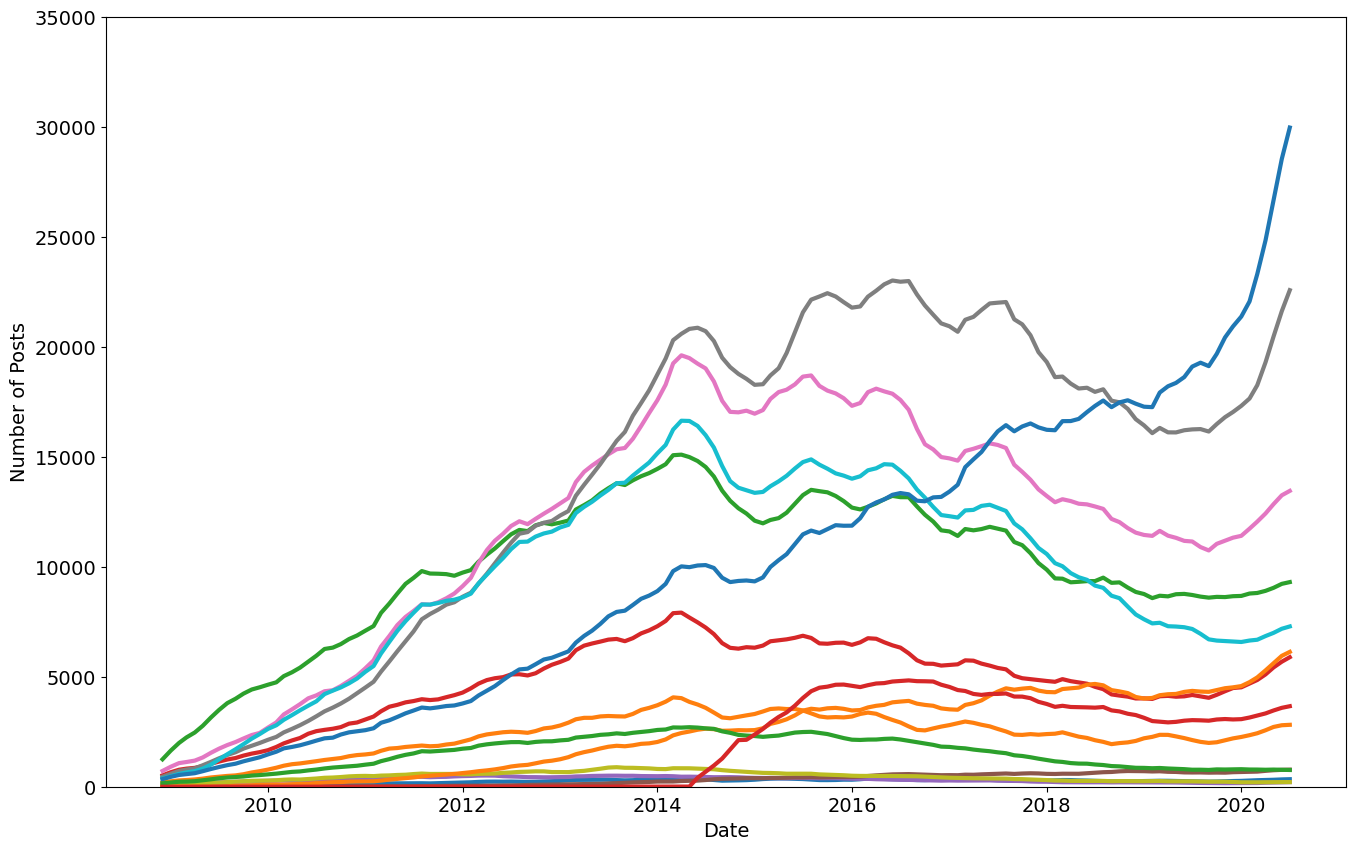

In [35]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_languages.columns:
    plt.plot(roll_languages.index, roll_languages[column], 
             linewidth=3, label=roll_languages[column].name)